# *Titanic: Machine Learning from Disaster*
## Análise exploratória dos dados do Titanic, focando em entender a relação entre os dados fornecidos de cada passageiro e a sua probabilidade de ter sobrevivido ao acidente, para com essas informações construir um modelo que prevê se um passageiro sobreviveu ou não baseado nos seu dados.
## 1) Análise exploratória dos dados
## 2) Construção do modelo preditivo
### Todos os dados foram fornecidos pela competição *"Titanic: Machine Learning from Disaster"* do site Kaggle: https://www.kaggle.com/c/titanic

## Análise exploratória dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

Vamos acessar e visualizar a forma como os dados estão organizados.

In [2]:
df = pd.read_csv("C:/Users/Gabriel/Desktop/Data Science/Python/Titanic/train.csv")
df.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


O que significa cada variável:

    survival => informação se o passageiro sobreviveu ou não ao acidente (0 se não sobreviveu, 1 se sobreviveu).
    pclass => classe em que estava o passageiro,(1 para primeira classe, 2 para segunda classe e 3 para terceira classe).
    sex => sexo do passageiro.
    age => idade em anos.
    sibsp => número de irmãos e cônjuges do passageiro que estão abordo no navio.
    parch => número de pais e filhos do passageiro que estão abordo no navio.
    ticket => código do bilhete de embarcação.
    fare => tarifa paga pelo passageiro.
    embarked => porto em que o passageiro embarcou.
    

Vamos verificar algumas estatísticas dos passageiros:

    Primeiro, vamos ver quantos passageiros do nosso dataset sobreviveram:

In [3]:
df.groupby('survived').count()[["name"]]

,name
survived,
0,549
1,342


    Também é interessante ver quantos passageiros pertencem a cada sexo:

In [4]:
df.groupby('sex').count()[['name']]

,name
sex,
female,314
male,577


    E quantos passageiros há em cada classe:

In [5]:
df.groupby('pclass').count()[['name']]

,name
pclass,
1,216
2,184
3,491


Agora já podemos testar algumas hipóteses para adquirir um conhecimento mais preciso sobre os nossos dados e entender quais variáveis são importantes para determinar a sobrevivência do passageiro.

    Testar a hipótese de que passageiros de classes mais altas tem maior chance de sobreviver:

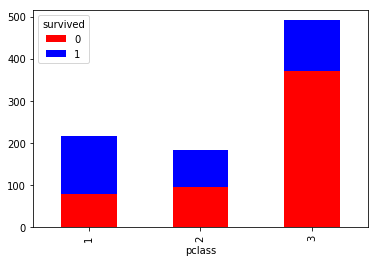

In [6]:
temp1 = pd.crosstab(df['pclass'], df['survived'])
temp1.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

O gráfico mostra clara evidência de que quanto mais alta for a classe do passageiro maior a chance dele sobreviver, uma explicação plausível para isso é de que os aposentos de classes mais altas ficam nos lugares mais altos e consequentemente mais seguros em caso de naufrágio do navio. Esse teste gerou uma boa evidência de que o parâmetro "pclass" pode ser muito útil para ser usado no modelo de classificação.

    Testar a hipótese de que o sexo influencia a chance de sobrevivência do passageiro:

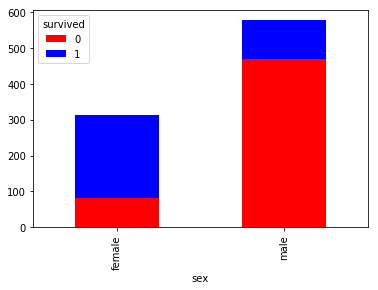

In [7]:
temp2 = pd.crosstab(df['sex'], df['survived'])
temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Novamente o teste confirma a nossa hipótese, mulheres tem maior chance de sobrevivência. isso confirma a intuição inicial de que em uma situação de risco há, muitas vezes, uma cultura de dar preferência a salvação/sobrevivência de crianças e mulheres primeiramente.

Agora vamos testar se a idade influencia na chance de sobrevivência, porém, a idade é um parâmetro numérico e não de categorias, portanto primeiro devemos construir uma maneira de categorizar a idade (dividir entre intervalos).

    Para isso, um bom primeiro passo é visualizar os quartis (valores dados a partir do conjunto de observações ordenado em ordem crescente, que dividem a distribuição em quatro partes iguais) da distribuição de idade entre os passageiros.

,age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


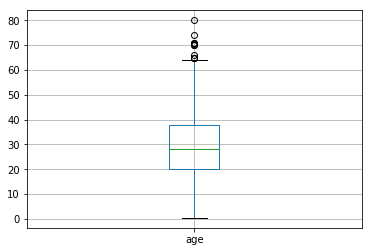

In [8]:
df.boxplot(column='age')
df.describe()[['age']]

Podemos perceber que a maior concentração de passageiros está na faixa de 20 a 40 anos, vamos criar agora um gráfico para visualizar se há alguma relação entre a chance de sobrevivência e a idade do passageiro. Para isso irei criar uma nova variável chamada "generation", que terá 3 possíveis valores: "new" para jovens até 18 anos, "adult" para pessoas de 18 a 40 anos e "old" para pessoas acima de 40 anos e após isso verificar a taxa de sobrevivência de cada um desses 3 grupos.

    Uma questão importante é que os valores de grande parte dos passageiros na variável idade está como NaN (Not a Number), ou seja, são valores desconhecidos.

In [9]:
df.apply(lambda x: sum(x.isnull()),axis=0)

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

    Portanto iremos tratar como desconhecido também a variável "generation" desses passageiros com idade desconhecida.

In [10]:
time = []
for i in df['age']:
    if np.isnan(i)==True:
        time.append(np.nan)
    elif i<=18:
        time.append('new')
    elif 18<i<40:
        time.append('adult')
    else:
        time.append('old')
        
df2 = df.assign(generation = time)
df2.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,generation
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,old
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,new
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,adult
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,new


    Agora vamos visualizar a taxa de sobrevivência em cada um dos grupos:

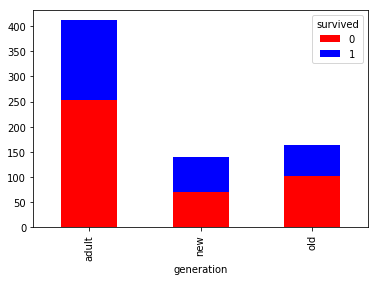

In [11]:
temp3 = pd.crosstab(df2['generation'], df2['survived'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Podemos perceber que pessoas mais novas tem maior chance de sobrevivência, isso também confirma a intuição inicial de que em uma situação de risco risco há, muitas vezes, uma cultura de dar preferência a salvação/sobrevivência de crianças e mulheres primeiramente.
A idade também mostra-se um parâmetro interessante para prever a sobrevivência de um passageiro. 

    Agora vamos analisar se o local de embarque também fornece alguma influência na chance de sobrevivência do passageiro:

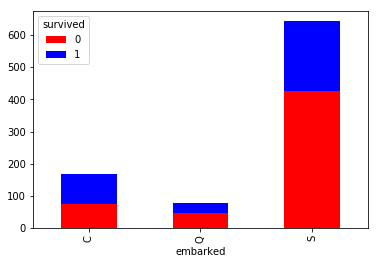

In [12]:
temp4 = pd.crosstab(df['embarked'], df['survived'])
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Vemos que há uma diferença na taxa de sobreviência entre os diferentes pontos de embarque, acentuando uma chance maior de sobrevivência no local "C";

Porém, como aparentemente não há nenhuma explicação lógica de que o local de embarque afete a sua chance de sobrevivência caso aconteça algum acidente, iremos olhar mais a fundo as características dos passageiros que embarcam em cada um dos locais.

Vamos tentar ver se existe alguma correlação entre o local de embarque e a classe em que ficou hospedado o passageiro.
    

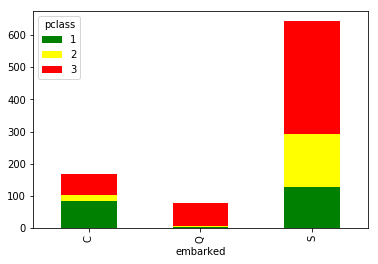

In [13]:
embarkclass = pd.crosstab(df["embarked"], df["pclass"])
embarkclass.plot(kind='bar', stacked=True, color=['green','yellow','red'], grid=False)

Esse gráfico mostra que existe uma grande correlação entre o local de embarque e a classe do passageiro, o que acaba confirmando a nossa intuição de que o local de embarque não deve ter influência na taxa de sobrevivência do passageiro; (O porto "C", que teve a maior taxa de sobrevivência também é o que tem maior taxa de passageiros da primeira classe, e o porto "Q", que teve a menor taxa de sobrevivência também é o que tem maior taxa de passageiros da terceira classe). Portanto, isso mostra que talvez seja uma boa ideia não usar a variável "embarked" para prever se um passageiro irá sobreviver ou não, e sim em vez disso usar a variável "pclass".

## Criação do modelo preditivo

In [14]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)
test = pd.read_csv("C:/Users/Gabriel/Desktop/Data Science/Python/Titanic/test.csv")
test.head(5)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


    Como a biblioteca sklearn requer que todos os valores sejam numéricos e temos algumas variáveis categóricas, vamos converter estas variáveis categóricas em numéricas com a ajuda da biblioteca sklearn.preprocessing, mas antes disso vamos preencher os valores perdidos.

In [15]:
df.apply(lambda x: sum(x.isnull()),axis=0)

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [16]:
test.apply(lambda y: sum(y.isnull()),axis=0)

pclass        0
name          0
sex           0
age          86
sibsp         0
parch         0
ticket        0
fare          1
cabin       327
embarked      0
dtype: int64

In [17]:
df['cabin'].fillna(df['cabin'].mode()[0], inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['age'].fillna(df['age'].mode()[0], inplace=True)
test['cabin'].fillna(test['cabin'].mode()[0], inplace=True)
test['fare'].fillna(test['fare'].mode()[0], inplace=True)
test['age'].fillna(test['age'].mode()[0], inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['name','sex','ticket','cabin','embarked']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

survived      int64
pclass        int64
name          int32
sex           int32
age         float64
sibsp         int64
parch         int64
ticket        int32
fare        float64
cabin         int32
embarked      int32
dtype: object

Criando um dataset extra para usarmos depois para melhorar nosso modelo:

In [19]:
df3=df

In [20]:
# Labels são os valores que queremos prever
labels = np.array(df['survived'])

df = df.drop('survived', axis = 1)

feature_list = list(df.columns)

df = np.array(df)

In [21]:
# Usando o sciki-learn para dividir o dataset em treino e teste
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25, random_state = 27)

    Modelo de Treinamento

In [22]:
# Importar o modelo Random Forest que vamos usar
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 27)
# Treinar o modelo no dataset de treino
rf.fit(train_features, train_labels);

Fazendo previsões no dataset de teste:

In [23]:
predictions = rf.predict(test_features)

In [24]:
print (test_labels)
print (predictions)

[1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0
 0]
[0.813 0.798 0.733 0.959 0.059 0.386 0.105 0.906 1.    0.817 0.054 0.985
 0.1   0.999 0.013 0.039 0.913 0.028 0.129 0.724 0.317 1.    0.099 0.048
 0.67  0.047 0.679 0.42  0.762 0.132 0.004 0.188 0.281 0.007 0.69  0.308
 0.032 0.043 1.    0.442 0.729 0.426 0.052 1.    0.578 1.    1.    0.051
 0.076 0.    0.086 0.674 0.29  0.219 0.48  0.108 0.632 0.758 0.09  0.342
 0.352 0.701 0.019 0.076 0.159 0.771 0.005 0.05  0.999 0.134 0.16  0.243
 0.035 1.    0.263 0.297 0.749 0.954 0.288 0.073 0.019 0.135 0.278 0.18
 0.342 0.994 0.206 0.026 0.221 1.   

Convertendo os valores para 0 ou 1, pois uma pessoa só estes 2 resultados possíveis que queremos: 0 para "não sobreviveu" e 1 para "sobreviveu":

In [25]:
y=0
for i in predictions:
    if i>0.5:
        predictions[y]=1
        y=y+1
    else:
        predictions[y]=0
        y=y+1

In [26]:
print(predictions)

[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0.]


    Calculando a porcentagem de acertos:

In [27]:
acertos=0
erros=0
z=0
for i in predictions:
    if predictions[z] == test_labels[z]:
        acertos = acertos+1
        z=z+1
    else:
        erros = erros+1
        z=z+1

print (acertos, " acertos e ", erros, " erros")
ratio = (erros/acertos)
rate = (1-ratio)*100
print(rate,"% de precisão")

191  acertos e  32  erros
83.24607329842932 % de precisão


### Resultado: aprox. 83% de acerto no nosso teste

    Agora vamos tentar fazer uma Feature Reduction, eliminando do nosso modelo alguns dados que pareciam não ser relevantes para a nossa previsão

In [28]:
# Labels são os valores que queremos prever
labels = np.array(df3['survived'])

df3 = df3.drop('survived', axis = 1)
#Eliminando também as colunas que não serão usadas no modelo, deixando: pclass, sex e age
df3= df3.drop(['name','sibsp','parch','ticket','fare','cabin','embarked'], axis = 1)

feature_list2 = list(df3.columns)

df3 = np.array(df3)

In [29]:
# Usando o sciki-learn para dividir o dataset em treino e teste
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(df3, labels, test_size = 0.25, random_state = 27)

In [30]:
# Importar o modelo Random Forest que vamos usar
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 27)
# Treinar o modelo no dataset de treino
rf.fit(train_features, train_labels);

In [31]:
predictions2 = rf.predict(test_features)

In [32]:
y=0
for i in predictions2:
    if i>0.5:
        predictions2[y]=1
        y=y+1
    else:
        predictions2[y]=0
        y=y+1

In [33]:
acertos2=0
erros2=0
z=0
for i in predictions2:
    if predictions2[z] == test_labels[z]:
        acertos2 = acertos2+1
        z=z+1
    else:
        erros2 = erros2+1
        z=z+1

print (acertos2, " acertos e ", erros2, " erros")
ratio2 = (erros2/acertos2)
rate2 = (1-ratio2)*100
print(rate2,"% de precisão")

179  acertos e  44  erros
75.41899441340783 % de precisão


Agora nosso segundo modelo teve uma taxa de aproximadamente 75% de precisão, cerca de 8% menos preciso que o nosso primeiro modelo, que teve mais de 83% de precisão.